### Importing the libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis
from tabulate import tabulate  

In [45]:
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [46]:
df = pd.read_csv('insurance.csv')

### Data Cleaning

##### Displaying the first five rows of dataset

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Checking type of data and missing values

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Visualization for Null values

In [49]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

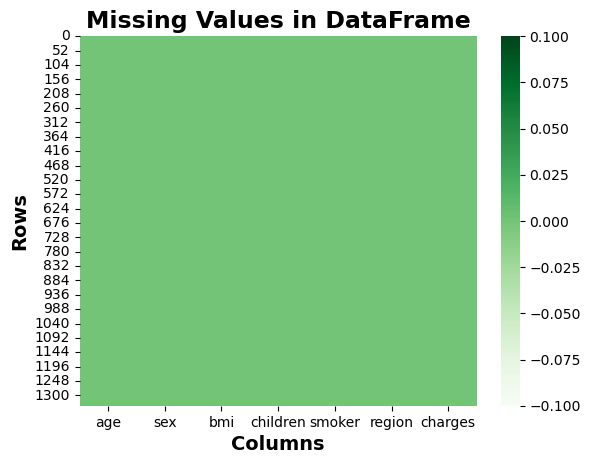

In [50]:
# Customize the color palette to green
sns.heatmap(df.isnull(), cmap='Greens', cbar=True)

plt.title('Missing Values in DataFrame', fontsize=17, fontweight='bold')
plt.xlabel('Columns', fontsize=14, fontweight='bold')
plt.ylabel('Rows', fontsize=14, fontweight='bold')
plt.show()

- Our dataset is completely clean and doesn't contain any Null Values

##### Checking the number of rows and columns in the dataset

In [51]:
df.shape

(1338, 7)

- The dataset has 1338 rows and 7 columns

##### Describing the data

In [52]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


##### Encoding the 'object' type columns

In [53]:
blemish = df['sex'].value_counts()
varr = df['smoker'].value_counts()
color = df['region'].value_counts()

In [54]:
blemish

male      676
female    662
Name: sex, dtype: int64

In [55]:
varr

no     1064
yes     274
Name: smoker, dtype: int64

In [56]:
color

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [57]:
# Columns we want to encode

columns_to_encode_reg = ['sex','smoker' ,'region']  #omitting it here as we need the continuous values

# Applying label encoding to each column in the list

for column in columns_to_encode_reg:
    df[column] = LabelEncoder().fit_transform(df[column])
    
# Print the dataset to check the changes
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


##### Describing the data again

In [58]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Exploratory Data Analysis

##### Checking for duplicates and removing them

In [59]:
# checking if there are duplicated rows using the df.duplicated() function

df[df.duplicated(keep = 'first')]       # keep = 'first' does not mark the first occurrence as duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,1,30.59,0,0,1,1639.5631


In [60]:
# get the original shape of the dataframe
original_shape = df.shape

# drop the duplicated rows
df.drop_duplicates(keep = "first", inplace = True)

# get the new shape of the dataframe
new_shape = df.shape

print(f"Shape of dataframe before dropping duplicates: {original_shape}")
print(f"Shape of dataframe after dropping duplicates: {new_shape}")
print(f"Total rows dropped: {original_shape[0] - new_shape[0]}")

Shape of dataframe before dropping duplicates: (1338, 7)
Shape of dataframe after dropping duplicates: (1337, 7)
Total rows dropped: 1


##### Relationship/Correlation of columns with each other

In [61]:
def plot_correlation_heatmap(df, save_path=None, dpi=300):
    """
    Plot a correlation heatmap for the given DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing numeric columns.
        save_path (str, optional): File path to save the heatmap image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    # Calculate correlation matrix
    corr = df.corr()

    # Create a mask to display only the lower triangle of the matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Plot heatmap
    sns.heatmap(corr, annot=True,cmap='Greens', fmt='.2f', mask=mask)

    # Add title
    plt.title('Correlation Heatmap', fontsize=18, fontweight='bold')

    # Save the plot
    plt.savefig(save_path, dpi=dpi)

    # Show plot
    plt.show()

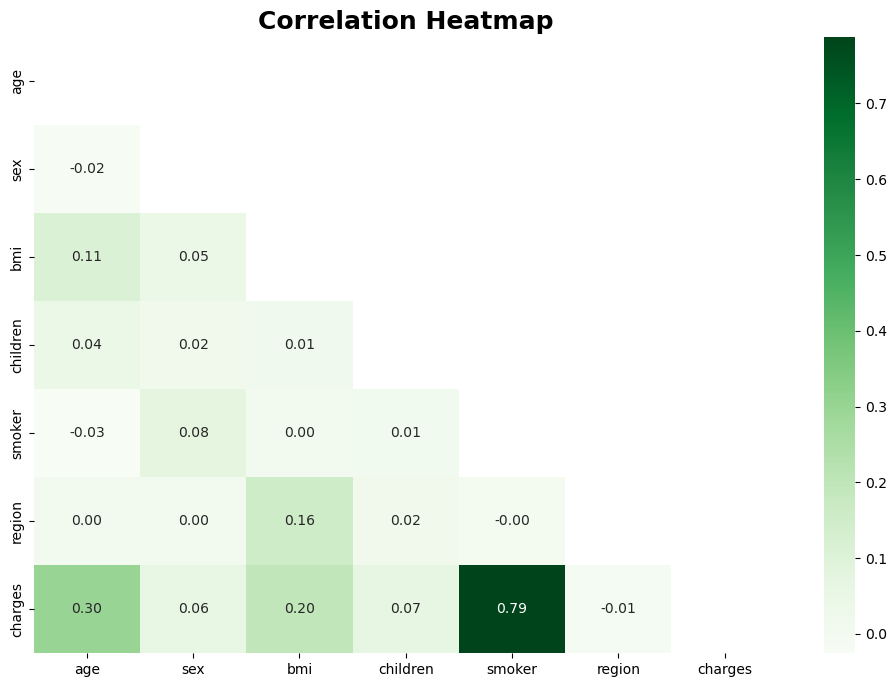

In [62]:
plot_correlation_heatmap(df, save_path='m1.png', dpi=300)

The **correlation coefficient** is a number between -1 and 1 that indicates how strong and in what direction the relationship is between two variables.

- A correlation coefficient of 1 indicates a perfect positive correlation meaning that as the value of one variable increases, the value of the other variable also increases.
- A correlation coefficient of 0 indicates no correlation between the two variables.

Here:
- ‘charges’ and ‘smoker’ (0.79), ‘charge’ and ‘age’ (0.30) and similarly all those which are greater than 0 are indicating moderate positive correlation, which means that one increases as the other increases.
- Other variables exhibit either weak positive correlation, weak negative correlation, or no correlation (close to 0).

##### Boxplots

In [63]:
def plot_boxplots(df, columns, save_path=None, dpi=300):
    """
    Plot boxplots for specified columns in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        columns (list): List of column names for which boxplots will be plotted.
        save_path (str, optional): File path to save the boxplot image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    # Create a figure and axes for the boxplot
    num_columns = len(columns)
    rows = (num_columns + 1) // 2  # Calculate number of rows needed based on columns
    plt.figure(figsize=(18, 5 * rows))  # Adjust figure size based on the number of columns

    # Loop through each column and create a boxplot
    for i, column in enumerate(columns):
        plt.subplot(rows, 2, i + 1)  # Create subplots dynamically based on number of columns
        sns.boxplot(x=df[column], color='green')  # Create boxplot with specified color
        plt.title(f'Box plot of {column}', fontsize=18, fontweight='bold')  # Set title
        plt.xlabel(column, fontsize=14, fontweight='bold')  # Set x-axis label
        plt.ylabel('Value', fontsize=14, fontweight='bold')  # Set y-axis label

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    #Save the plot
    plt.savefig(save_path, dpi=dpi)

    # Display the boxplot
    plt.show()

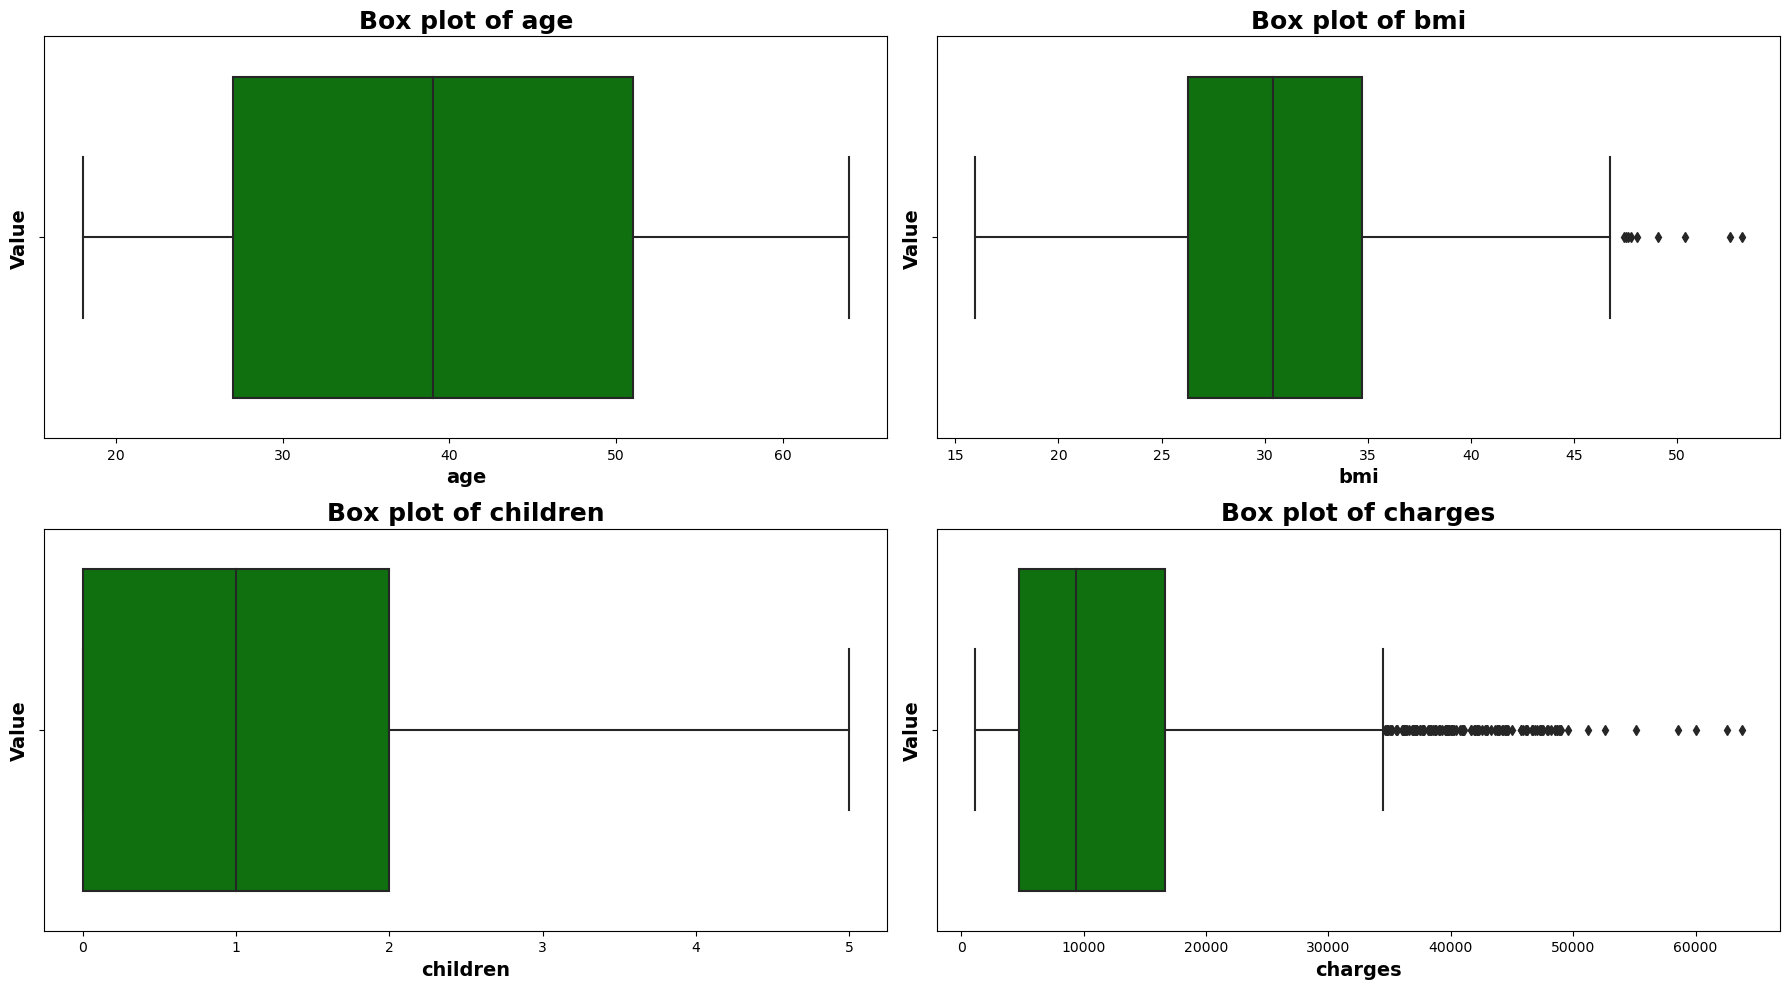

In [64]:
c=['age', 'bmi', 'children', 'charges']
plot_boxplots(df, c, save_path='m2.png', dpi=300)

##### Major Moments

In [65]:
# Calculate statistics
mean_values = df.mean()
median_values = df.median()
std_dev_values = df.std()
skewness_values = df.apply(lambda x: skew(x))
kurtosis_values = df.apply(lambda x: kurtosis(x))

# Create a DataFrame to display all statistics
stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Std Dev': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

# Print the statistics DataFrame using tabulate for a nicely formatted table
print("Major Moments:")
print(tabulate(stats_df, headers='keys', tablefmt='psql'))  # 'psql' table format

Major Moments:
+----------+--------------+----------+--------------+------------+------------+
|          |         Mean |   Median |      Std Dev |   Skewness |   Kurtosis |
|----------+--------------+----------+--------------+------------+------------|
| age      |    39.2221   |    39    |    14.0443   |  0.0547193 | -1.24424   |
| sex      |     0.504862 |     1    |     0.500163 | -0.0194474 | -1.99962   |
| bmi      |    30.6635   |    30.4  |     6.10047  |  0.283596  | -0.0572337 |
| children |     1.09574  |     1    |     1.20557  |  0.936369  |  0.195719  |
| smoker   |     0.204936 |     0    |     0.403806 |  1.46196   |  0.137323  |
| region   |     1.51608  |     2    |     1.10521  | -0.0390242 | -1.32791   |
| charges  | 13279.1      |  9386.16 | 12110.4      |  1.51369   |  1.59374   |
+----------+--------------+----------+--------------+------------+------------+


**Skewness** is described as the asymmetry measure of the data distribution, whereas **Kurtosis** is described as tailedness or peakedness measure of the data distribution. The following code determines the skewness and kurtosis values of all the columns present in the dataset:

**For Skewness:**
- Skewness approximately equal to 0, the distribution is symmetric.
- Skewness is greater than 0, the distribution is right skewed.
- Skewness is lesser than 0, the distribution is left skewed.
- The columns 'sex', 'region' and 'age' are almost symmetric.
- The columns 'bmi' and 'children' are weakly right skewed.
- The columns  'smoker' and 'charges' are moderate right skewed.

**For Kurtosis:**
- Kurtosis lesser than 3 indicates lighter tails and a flatter peak (platykurtic).
- All the columns of this dataset are platykurtic.

##### Distribution/Bar Plots (Visualizing Skewness and Kurtosis)

In [66]:
def plot_distribution_plots(df, features, num_cols=3, plot_color='purple', save_path=None, dpi=300):
    """
    Plot distribution plots for specified features in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        features (list): List of feature column names to plot.
        num_cols (int, optional): Number of plots to display per row (default: 3).
        plot_color (str, optional): Color for the distribution plots (default: 'purple').
        save_path (str, optional): File path to save the distribution plots image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    num_features = len(features)
    num_rows = (num_features - 1) // num_cols + 1  # Calculate number of rows needed

    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
    plt.subplots_adjust(wspace=0.2, hspace=0.31)

    for i in range(num_features):
        row = i // num_cols
        col = i % num_cols
        sns.distplot(df[features[i]], fit=norm, ax=ax[row, col], color=plot_color)
        title = 'Distribution: ' + features[i]
        ax[row, col].set_title(title, fontsize=17, fontweight='bold')
        ax[row, col].xaxis.label.set_fontsize(14)
        ax[row, col].yaxis.label.set_fontsize(14)
        ax[row, col].xaxis.label.set_fontweight('bold')
        ax[row, col].yaxis.label.set_fontweight('bold')

        # Hide the y-axis label for all but the first column in each row
        if col != 0:
            ax[row, col].yaxis.set_visible(False)

    # Save the plot
    plt.savefig(save_path, dpi=dpi)

    # Display the distribution plots
    plt.show()

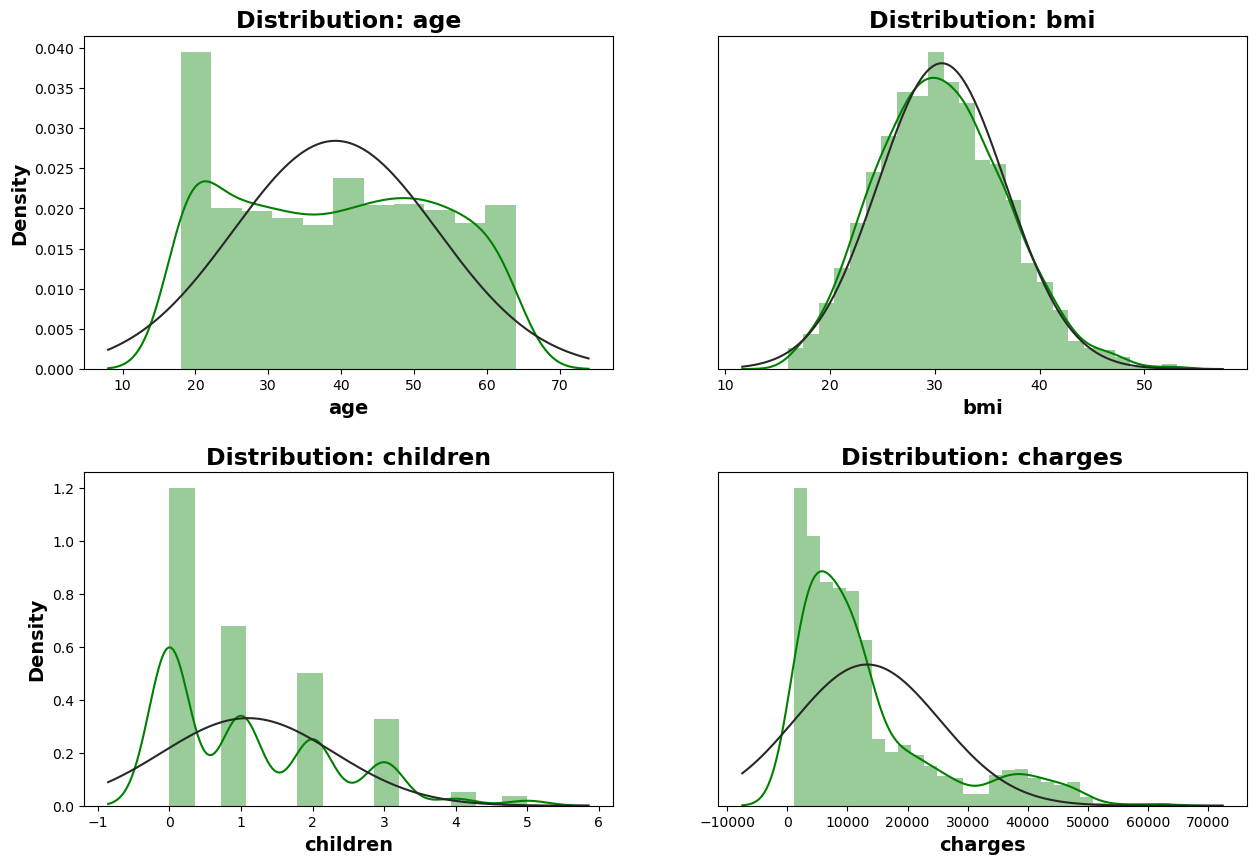

In [67]:
plot_distribution_plots(df, c, num_cols=2, plot_color='green', save_path='m3.png', dpi=300)

##### Scatterplot

In [68]:
def plot_scatter_with_hue(df, x_col, y_col, hue_col, title=None, xlabel=None, ylabel=None, save_path=None, dpi=300):
    """
    Plot a scatter plot with hue based on a categorical variable.

    Parameters:
        df (DataFrame): Input DataFrame.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue (categorical variable).
        title (str, optional): Title of the plot (default: None).
        xlabel (str, optional): Label for the x-axis (default: None).
        ylabel (str, optional): Label for the y-axis (default: None).
        save_path (str, optional): File path to save the plot image.
        dpi (int, optional): Dots per inch for saving the image (default: 300).

    Returns:
        None
    """
    plt.figure(figsize=(6, 4))
    plt.title(title, fontsize=17, fontweight='bold') if title else None
    plt.ylabel(ylabel, fontsize=14, fontweight='bold') if ylabel else None
    plt.xlabel(xlabel, fontsize=14, fontweight='bold') if xlabel else None

    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col)

    # Adjust layout
    plt.tight_layout()

    # Save the plot 
    plt.savefig(save_path, dpi=dpi)

    # Display the plot
    plt.show()

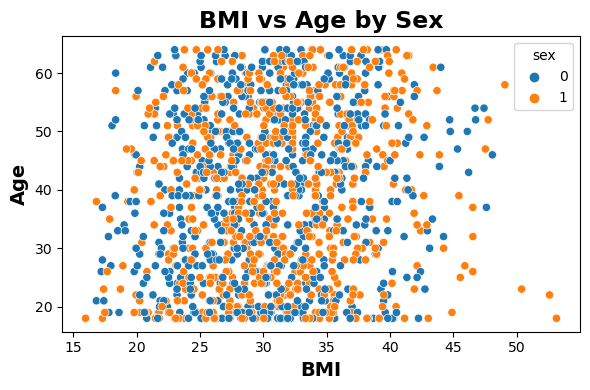

In [69]:
plot_scatter_with_hue(df, x_col='bmi', y_col='age', hue_col='sex',
                      title="BMI vs Age by Sex",
                      xlabel='BMI', ylabel='Age',
                      save_path='m4.png', dpi=300)

##### Elbow Method for Optimal 'k'

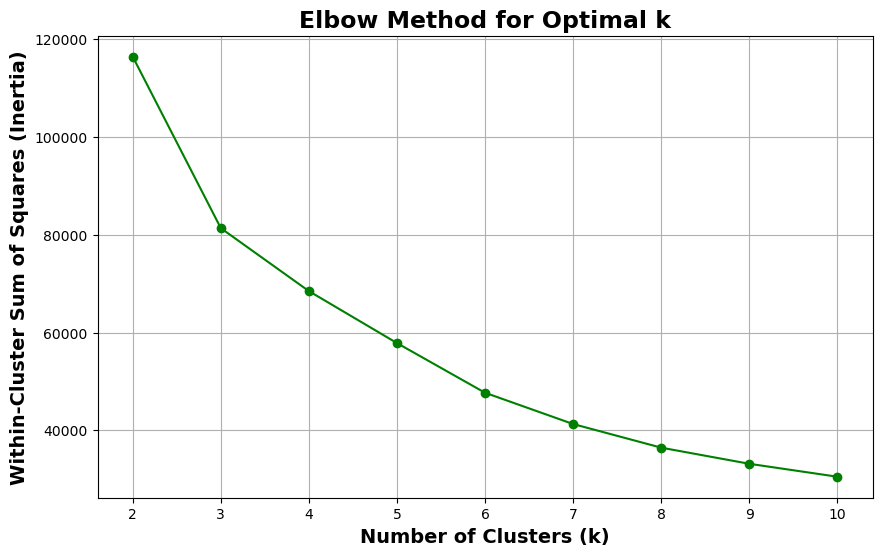

In [70]:
# Extract features for clustering (exclude the 'quality' column)
X = df.drop('charges', axis=1)

# Initialize lists to store inertia values
inertia_values = []

# Test different values of k (number of clusters)
k_values = range(2, 11)  # Test k from 2 to 10

for k in k_values:
    # Create KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Clusters (k)', fontsize=14, fontweight='bold')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=14, fontweight='bold')
plt.title('Elbow Method for Optimal k', fontsize=17, fontweight='bold')
plt.xticks(k_values)
plt.grid(True)
plt.savefig('m5.png', dpi=300)
plt.show()

### Model Creation and Evaluation

##### Clustering

In [71]:
def perform_kmeans_clustering(df, features, n_clusters=3, random_state=None):
    """
    Perform K-means clustering on specified features in the DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        features (list): List of feature column names to use for clustering.
        n_clusters (int, optional): Number of clusters to form (default: 3).
        random_state (int, optional): Random seed for reproducibility (default: None).

    Returns:
        dict: A dictionary containing important variables from the K-means clustering:
            - 'cluster_labels': Series of cluster labels assigned to each data point.
            - 'cluster_centers': Array of cluster centers.
        km (Model): Trained K-Means model
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=n_clusters, random_state=random_state)

    # Fit K-means and assign cluster labels
    df['cluster'] = km.fit_predict(df[features])

    # Get cluster labels and cluster centers
    cluster_labels = df['cluster']
    cluster_centers = km.cluster_centers_

    # Return important variables as a dictionary
    return {'cluster_labels': cluster_labels, 'cluster_centers': cluster_centers}, km

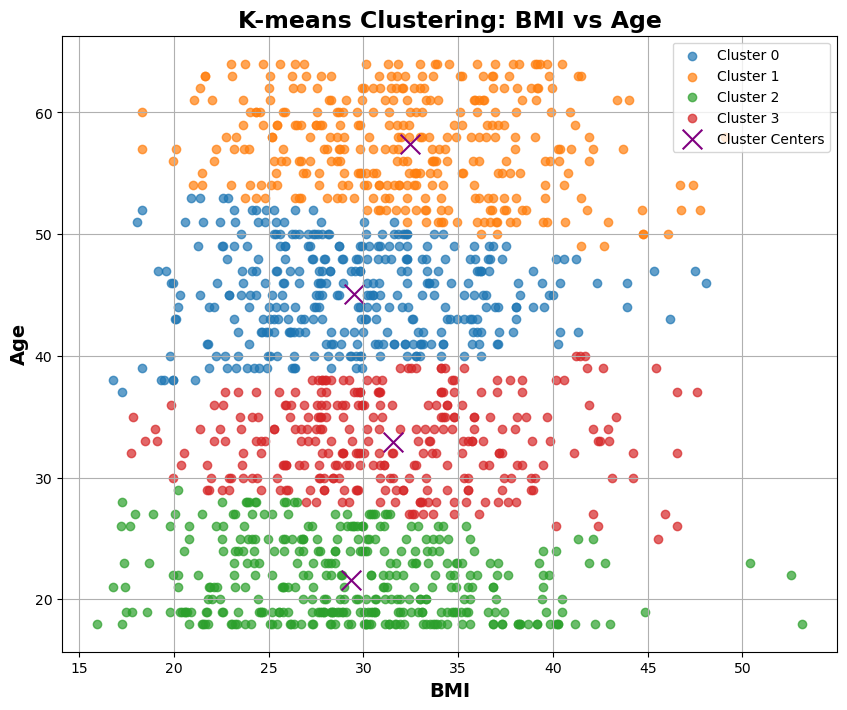

In [72]:
kmeans_data, km = perform_kmeans_clustering(df, features=['bmi', 'age'], n_clusters=4, random_state=42)

#Plot clusters with cluster centers based on the returned data
plt.figure(figsize=(10, 8))
for cluster_label in sorted(kmeans_data['cluster_labels'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['bmi'], cluster_data['age'], label=f'Cluster {cluster_label}', alpha=0.7)

#Plot cluster centers
cluster_centers = kmeans_data['cluster_centers']
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='purple', label='Cluster Centers')

#Set plot title and labels
plt.title('K-means Clustering: BMI vs Age', fontsize=17, fontweight='bold')
plt.xlabel('BMI', fontsize=14, fontweight='bold')
plt.ylabel('Age', fontsize=14, fontweight='bold')

#Add legend and grid
plt.legend()
plt.grid(True)

#Save the plot if needed
plt.savefig('m6.png', dpi=300)
plt.show()

##### Checking the code if it predicts correctly

In [73]:
# Example new data point(s) for prediction
new_data = pd.DataFrame({'bmi': [30, 40], 'age': [20, 40]})

# Use the trained K-means model to predict cluster labels for the new data
predicted_clusters = km.predict(new_data)

# Display the predicted cluster labels for the new data points
for i, cluster_label in enumerate(predicted_clusters):
    print(f"Predicted Cluster for New Data Point {i + 1}: {cluster_label}")

Predicted Cluster for New Data Point 1: 2
Predicted Cluster for New Data Point 2: 3


##### Visualizing the Predictions

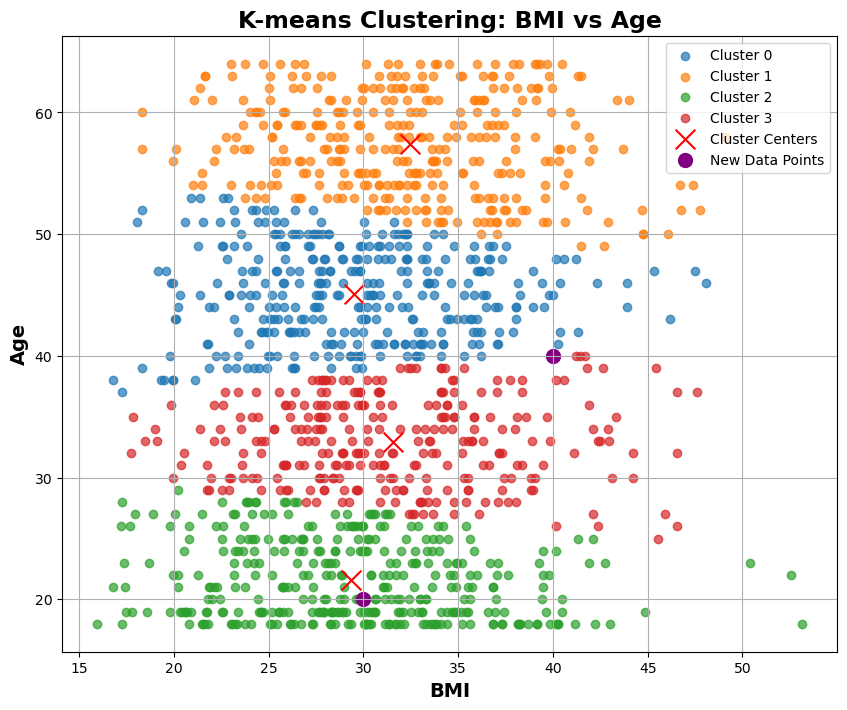

In [74]:
# Plot the new data points along with existing clusters and cluster centers
plt.figure(figsize=(10, 8))

# Plot each existing cluster using a different color
for cluster_label in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['bmi'], cluster_data['age'], label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centers
cluster_centers = km.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Plot the new data points with predicted cluster labels
plt.scatter(new_data['bmi'], new_data['age'], marker='o', s=100, c='purple', label='New Data Points')

# Set plot title and labels
plt.title('K-means Clustering: BMI vs Age', fontsize=17, fontweight='bold')
plt.xlabel('BMI', fontsize=14, fontweight='bold')
plt.ylabel('Age', fontsize=14, fontweight='bold')

# Add legend
plt.legend()
plt.grid(True)
plt.savefig('m8.png', dpi=300)
plt.show()

##### Fitting

In [75]:
def perform_linear_regression(df, target_col, test_size=0.2, random_state=None):
    """
    Perform linear regression on the dataset and return important variables.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        target_col (str): Name of the target variable column.
        test_size (float, optional): Proportion of the dataset to include in the test split (default: 0.2).
        random_state (int, optional): Random seed for reproducibility (default: None).

    Returns:
        dict: A dictionary containing important variables from the linear regression:
            - 'X_train': Training features.
            - 'X_test': Test features.
            - 'y_train': Training target variable.
            - 'y_test': Test target variable.
            - 'model': Trained LinearRegression model.
            - 'y_pred': Predicted values on the test set.
    """
    # Separate features (X) and target variable (y)
    X = df.drop(target_col, axis=1) 
    y = df[target_col]

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize Linear Regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Return important variables as a dictionary
    return {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'model': model,
        'y_pred': y_pred,
    }

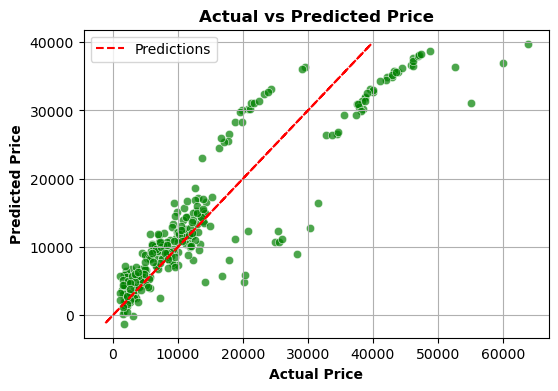

In [76]:
regression_info=perform_linear_regression(df, 'charges', test_size=0.2, random_state=42)
model = regression_info['model']
X_test = regression_info['X_test']
y_test = regression_info['y_test']
y_pred = regression_info['y_pred']

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.7)
plt.plot(y_pred, y_pred, color='red', linestyle='--', label='Predictions')  # Plot the diagonal line for perfect predictions
plt.title('Actual vs Predicted Price', fontsize=12, fontweight='bold')
plt.xlabel('Actual Price', fontsize=10, fontweight='bold')
plt.ylabel('Predicted Price', fontsize=10, fontweight='bold')
plt.legend()
plt.grid(True)
plt.savefig('m7.png', dpi=300)
plt.show()

In [77]:
#Calculating the coefficients

coefficients = model.coef_
print(f'Coefficients {coefficients}')

#Calculating the intercept

intercept = model.intercept_
print(f'Intercept: {intercept}')

#Calculating R-Squared

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

#Calculating Root Mean Squared Error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

#Calculating Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Coefficients [  250.29289247   -99.77182338   311.8862212    534.98135385
 23054.07253748  -237.7205336     32.62184254]
Intercept: -11134.611623919816
R2: 0.8070191497708058
RMSE: 5954.94764657269
MAE 4178.745003011598
Mean Squared Error: 35461401.473421626
